In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_test = pd.read_csv('ALS-TestingData-78.csv')
df_train = pd.read_csv('ALS-TrainingData-2223.csv')

In [3]:
df_train

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,ALT.SGPT._max,ALT.SGPT._median,ALT.SGPT._min,ALT.SGPT._range,AST.SGOT._max,AST.SGOT._median,AST.SGOT._min,AST.SGOT._range,Bicarbonate_max,Bicarbonate_median,Bicarbonate_min,Bicarbonate_range,Blood.Urea.Nitrogen..BUN._max,Blood.Urea.Nitrogen..BUN._median,Blood.Urea.Nitrogen..BUN._min,Blood.Urea.Nitrogen..BUN._range,bp_diastolic_max,bp_diastolic_median,bp_diastolic_min,bp_diastolic_range,bp_systolic_max,bp_systolic_median,bp_systolic_min,bp_systolic_range,Calcium_max,Calcium_median,Calcium_min,Calcium_range,Chloride_max,...,Hemoglobin_median,Hemoglobin_min,Hemoglobin_range,leg_max,leg_median,leg_min,leg_range,mouth_max,mouth_median,mouth_min,mouth_range,onset_delta_mean,onset_site_mean,Platelets_max,Platelets_median,Platelets_min,Potassium_max,Potassium_median,Potassium_min,Potassium_range,pulse_max,pulse_median,pulse_min,pulse_range,respiratory_max,respiratory_median,respiratory_min,respiratory_range,Sodium_max,Sodium_median,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,0.021164,24.0,22.0,18.0,0.020906,31,27.5,23.0,0.027875,30.0,28.0,25.0,0.017422,8.0322,7.11945,6.57180,0.005089,90,83.0,69,0.055556,160,139.0,129,0.082011,2.49500,2.220550,2.22055,0.000956,109.0,...,146.0,143.0,0.045296,8,6.5,4,0.010582,5,3.5,0,0.013228,-1023,1,172,169.0,152.0,4.5,4.25,4.0,0.001742,79,68.0,61,0.047619,4,3.0,3,0.002646,148.0,145.5,143.0,0.017422,533,8,7.0,7,0.002646,6.00,6.0,6.0
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,0.028725,25.0,13.0,8.0,0.029617,31,17.0,14.0,0.029617,32.0,28.0,25.0,0.012195,8.3973,4.74630,4.01610,0.007633,80,78.0,64,0.028725,140,132.5,104,0.064632,2.32035,2.170650,2.02095,0.000522,108.0,...,132.0,128.0,0.017422,8,7.5,3,0.008977,9,8.0,4,0.008977,-341,1,286,264.0,230.0,5.0,4.30,3.9,0.001916,90,76.0,64,0.046679,4,4.0,3,0.001795,142.0,138.0,136.0,0.010453,649,8,7.0,5,0.005386,7.00,5.0,5.0
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,0.025000,25.0,20.0,14.0,0.019643,24,19.0,18.0,0.010714,35.0,29.0,24.0,0.019643,5.4765,4.38120,3.65100,0.003260,86,76.0,58,0.050000,120,110.0,90,0.053571,2.47005,2.295400,2.19560,0.000490,108.0,...,154.0,151.0,0.017857,4,3.0,2,0.003571,10,7.0,4,0.010714,-1181,1,233,213.0,167.0,4.1,4.00,3.9,0.000357,82,73.0,60,0.039286,4,4.0,4,0.000000,145.0,143.0,140.0,0.008929,1234,5,0.0,0,0.008929,6.00,5.0,5.0
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,0.014963,62.0,60.0,41.0,0.052369,46,40.0,33.0,0.032419,23.0,20.0,20.0,0.007481,8.0322,8.03220,6.57180,0.003642,90,80.0,70,0.049875,150,130.0,120,0.074813,2.47005,2.345300,2.23000,0.000474,109.0,...,145.0,144.0,0.024938,4,3.5,2,0.004988,12,12.0,12,0.000000,-365,2,275,233.0,204.0,4.3,4.20,4.0,0.000748,84,72.0,68,0.039900,3,3.0,3,0.000000,143.0,139.0,138.0,0.012469,2492,5,5.0,3,0.004988,7.00,6.0,5.0
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,0.020374,38.0,26.5,22.0,0.026534,35,26.5,20.0,0.024876,32.0,28.0,23.0,0.014925,5.1114,4.19865,3.65100,0.002422,100,80.0,68,0.053068,160,130.0,104,0.092869,2.42015,2.257975,2.17065,0.000414,107.0,...,146.5,138.0,0.023217,2,2.0,0,0.003396,12,12.0,12,0.000000,-1768,2,313,283.5,268.0,4.6,3.75,3.5,0.001824,101,96.0,74,0.044776,4,4.0,3,0.001698,143.0,140.0,138.0,0.008292,2956,6,4.0,1,0.008489,6.00,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,2419,33,50.0,49.0,45.0,0.008772,-0.239501,35,32.5,30,0.009107,46.0,27.0,18.0,0.049123,38,27.0,23.0,0.026316,31.0,28.0,23.0,0.014035,5.4765,3.65100,2.92080,0.004484,85,78.0,70,0.027322,150,115.0,100,0.091

In [4]:
df_test

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,ALT.SGPT._max,ALT.SGPT._median,ALT.SGPT._min,ALT.SGPT._range,AST.SGOT._max,AST.SGOT._median,AST.SGOT._min,AST.SGOT._range,Basophils_max,Basophils_median,Basophils_min,Basophils_range,Bicarbonate_max,Bicarbonate_median,Bicarbonate_min,Bicarbonate_range,Bilirubin..total._max,Bilirubin..total._median,Bilirubin..total._min,Bilirubin..total._range,Blood.Urea.Nitrogen..BUN._max,Blood.Urea.Nitrogen..BUN._median,Blood.Urea.Nitrogen..BUN._min,Blood.Urea.Nitrogen..BUN._range,BMI_max,bp_diastolic_max,bp_diastolic_median,bp_diastolic_min,bp_diastolic_range,...,mouth_min,mouth_range,onset_delta_mean,onset_site_mean,Platelets_max,Platelets_median,Platelets_min,Potassium_max,Potassium_median,Potassium_min,Potassium_range,pulse_max,pulse_median,pulse_min,pulse_range,Red.Blood.Cells..RBC._max,Red.Blood.Cells..RBC._median,Red.Blood.Cells..RBC._min,Red.Blood.Cells..RBC._range,respiratory_max,respiratory_median,respiratory_min,respiratory_range,Sodium_max,Sodium_median,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min,Urine.Ph_range,White.Blood.Cell..WBC._max,White.Blood.Cell..WBC._median,White.Blood.Cell..WBC._min,White.Blood.Cell..WBC._range
0,3,65.906849,46.0,44.0,43,0.024590,-1.767329,33,5.0,2,0.028519,93,26.0,22,0.581967,72,24.0,21,0.418033,0.8,0.5,0.3,0.004098,27.0,25.0,23.0,0.032787,9.00,7.00,3.00,0.049180,7.900,7.100,5.700,0.018033,0.002969,91,76.0,69,0.180328,...,2,0.005520,-617,1,275,275.0,275,4.3,4.20,3.9,0.003279,90,77.0,61,0.237705,4700,4640,4450,2.049180,4,0.0,0,0.003680,139,138.0,137,0.016393,55888,7,0.0,0,0.006440,6.5,6.00,6.0,0.004098,8.57,7.680,6.60,0.016148
1,4,54.000000,39.0,36.0,33,0.013100,-1.351852,32,23.0,14,0.039301,47,35.5,21,0.056769,49,33.0,20,0.063319,1.2,0.7,0.3,0.001965,26.7,25.0,21.0,0.012445,19.00,9.50,5.00,0.030568,5.700,4.300,3.400,0.005022,0.002907,106,96.0,75,0.067686,...,11,0.002183,-328,4,349,270.0,215,4.6,4.20,3.8,0.001747,104,80.0,68,0.078603,5800,5100,4700,2.401747,4,4.0,3,0.002183,144,140.5,135,0.019651,61505,6,3.0,0,0.013100,6.5,5.50,5.0,0.003275,8.04,6.620,4.97,0.006703
2,5,56.394521,46.0,43.0,39,0.009736,-0.412429,15,10.0,2,0.017173,42,22.0,11,0.043115,37,22.0,14,0.031989,1.4,0.7,0.5,0.001252,27.0,24.0,20.0,0.009736,5.00,3.00,2.00,0.004172,8.200,5.400,2.900,0.007371,0.002281,85,72.5,65,0.026420,...,2,0.011889,-953,2,391,391.0,391,5.2,4.50,3.8,0.001947,123,103.5,70,0.070013,5130,4590,4190,1.307371,4,4.0,0,0.005284,141,139.0,136,0.006954,63255,0,0.0,0,0.000000,7.5,6.75,6.0,0.003456,8.90,7.160,5.01,0.005410
3,6,72.619178,50.0,42.5,41,0.092784,-0.383403,34,24.0,21,0.033592,109,39.5,20,0.917526,83,42.0,23,0.618557,0.9,0.7,0.3,0.006186,27.0,26.0,25.0,0.020619,9.00,5.00,3.00,0.061856,7.500,5.200,3.900,0.037113,0.002408,67,59.0,54,0.134021,...,2,0.015504,-490,1,383,383.0,383,4.8,4.50,4.4,0.004124,76,73.0,63,0.134021,4190,3950,3780,4.226804,4,4.0,3,0.002584,143,140.0,138,0.051546,70641,8,5.5,5,0.007752,7.5,7.00,6.0,0.024194,12.38,7.905,4.96,0.076495
4,9,65.000000,45.0,42.0,36,0.021327,0.000000,37,37.0,37,0.000000,48,16.5,13,0.082938,272,25.0,22,0.592417,1.1,0.8,0.6,0.001185,27.4,22.9,19.3,0.019194,12.00,9.50,5.00,0.016588,7.500,6.100,4.500,0.007109,0.002731,102,85.0,69,0.078199,...,12,0.000000,-329,4,357,258.0,229,5.1,4.45,4.1,0.002370,84,67.5,59,0.059242,5000,4700,4400,1.421801,4,4.0,4,0.000000,146,144.0,140,0.014218,108342,7,7.0,7,0.000000,6.0,5.50,5.0,0.002370,11.53,9.290,7.94,0.008507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,96,45.000000,42.0,39.5,37,0.010823,-0.683521,33,28.0,23,0.021645,171,60.0,37,0.

In [5]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2223.0,1214.874944,696.678300,1.0,614.500000,1213.00000,1815.500000,2424.000000
Age_mean,2223.0,54.550157,11.396546,18.0,47.000000,55.00000,63.000000,81.000000
Albumin_max,2223.0,47.011134,3.233980,37.0,45.000000,47.00000,49.000000,70.300000
Albumin_median,2223.0,43.952542,2.654804,34.5,42.000000,44.00000,46.000000,51.100000
Albumin_min,2223.0,40.766347,3.193087,24.0,39.000000,41.00000,43.000000,49.000000
...,...,...,...,...,...,...,...,...
trunk_min,2223.0,2.955915,2.358095,0.0,1.000000,3.00000,5.000000,8.000000
trunk_range,2223.0,0.007136,0.004503,0.0,0.003643,0.00692,0.009639,0.042017
Urine.Ph_max,2223.0,6.820450,0.932141,5.0,6.000000,7.00000,7.000000,9.000000
Urine.Ph_median,2223.0,5.710639,0.625039,5.0,5.000000,6.00000,6.000000,9.000000


In [6]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,78.0,51.589744,28.468910,3.000000,27.250000,51.500000,74.750000,100.000000
Age_mean,78.0,56.025571,10.514606,24.583562,51.000000,57.000000,62.180822,77.000000
Albumin_max,78.0,45.256410,3.056549,38.000000,43.000000,45.500000,47.000000,51.000000
Albumin_median,78.0,42.173077,3.083341,35.000000,40.000000,42.250000,44.000000,49.000000
Albumin_min,78.0,38.910256,3.977815,25.000000,36.250000,39.000000,41.000000,47.000000
...,...,...,...,...,...,...,...,...
Urine.Ph_range,78.0,0.004544,0.004776,0.000000,0.002278,0.003390,0.004715,0.034483
White.Blood.Cell..WBC._max,78.0,9.341795,2.939529,4.110000,7.767500,8.750000,10.690000,22.490000
White.Blood.Cell..WBC._median,78.0,6.789103,1.683264,3.240000,5.878750,6.720000,7.730000,11.795000
White.Blood.Cell..WBC._min,78.0,5.286026,1.513861,1.430000,4.330000,5.320000,6.125000,9.500000


In [7]:
import missingno as msno

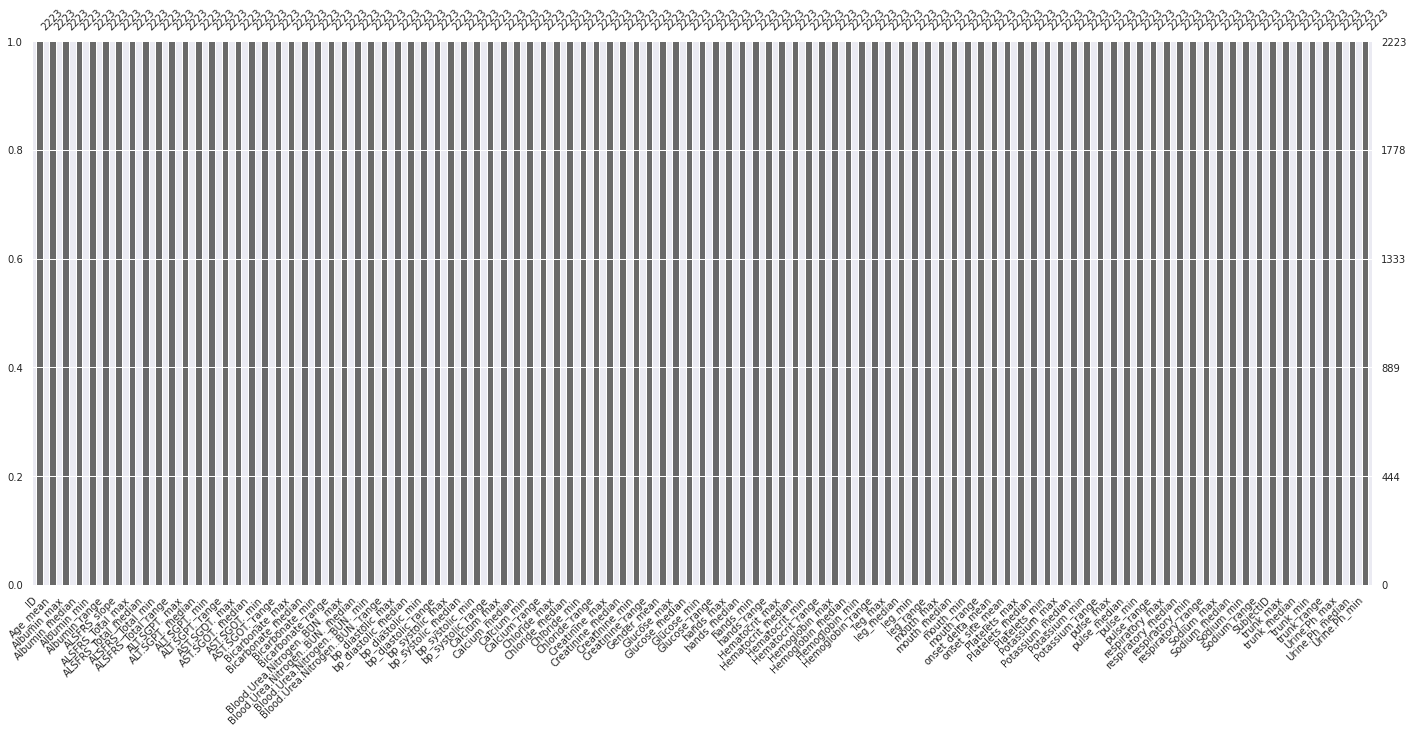

In [8]:
msno_plot = msno.bar(df_train, labels=True, fontsize=10)

In [9]:

# Data for Analysis
df_train_model = df_train.drop(labels=['ID','SubjectID'], axis=1)

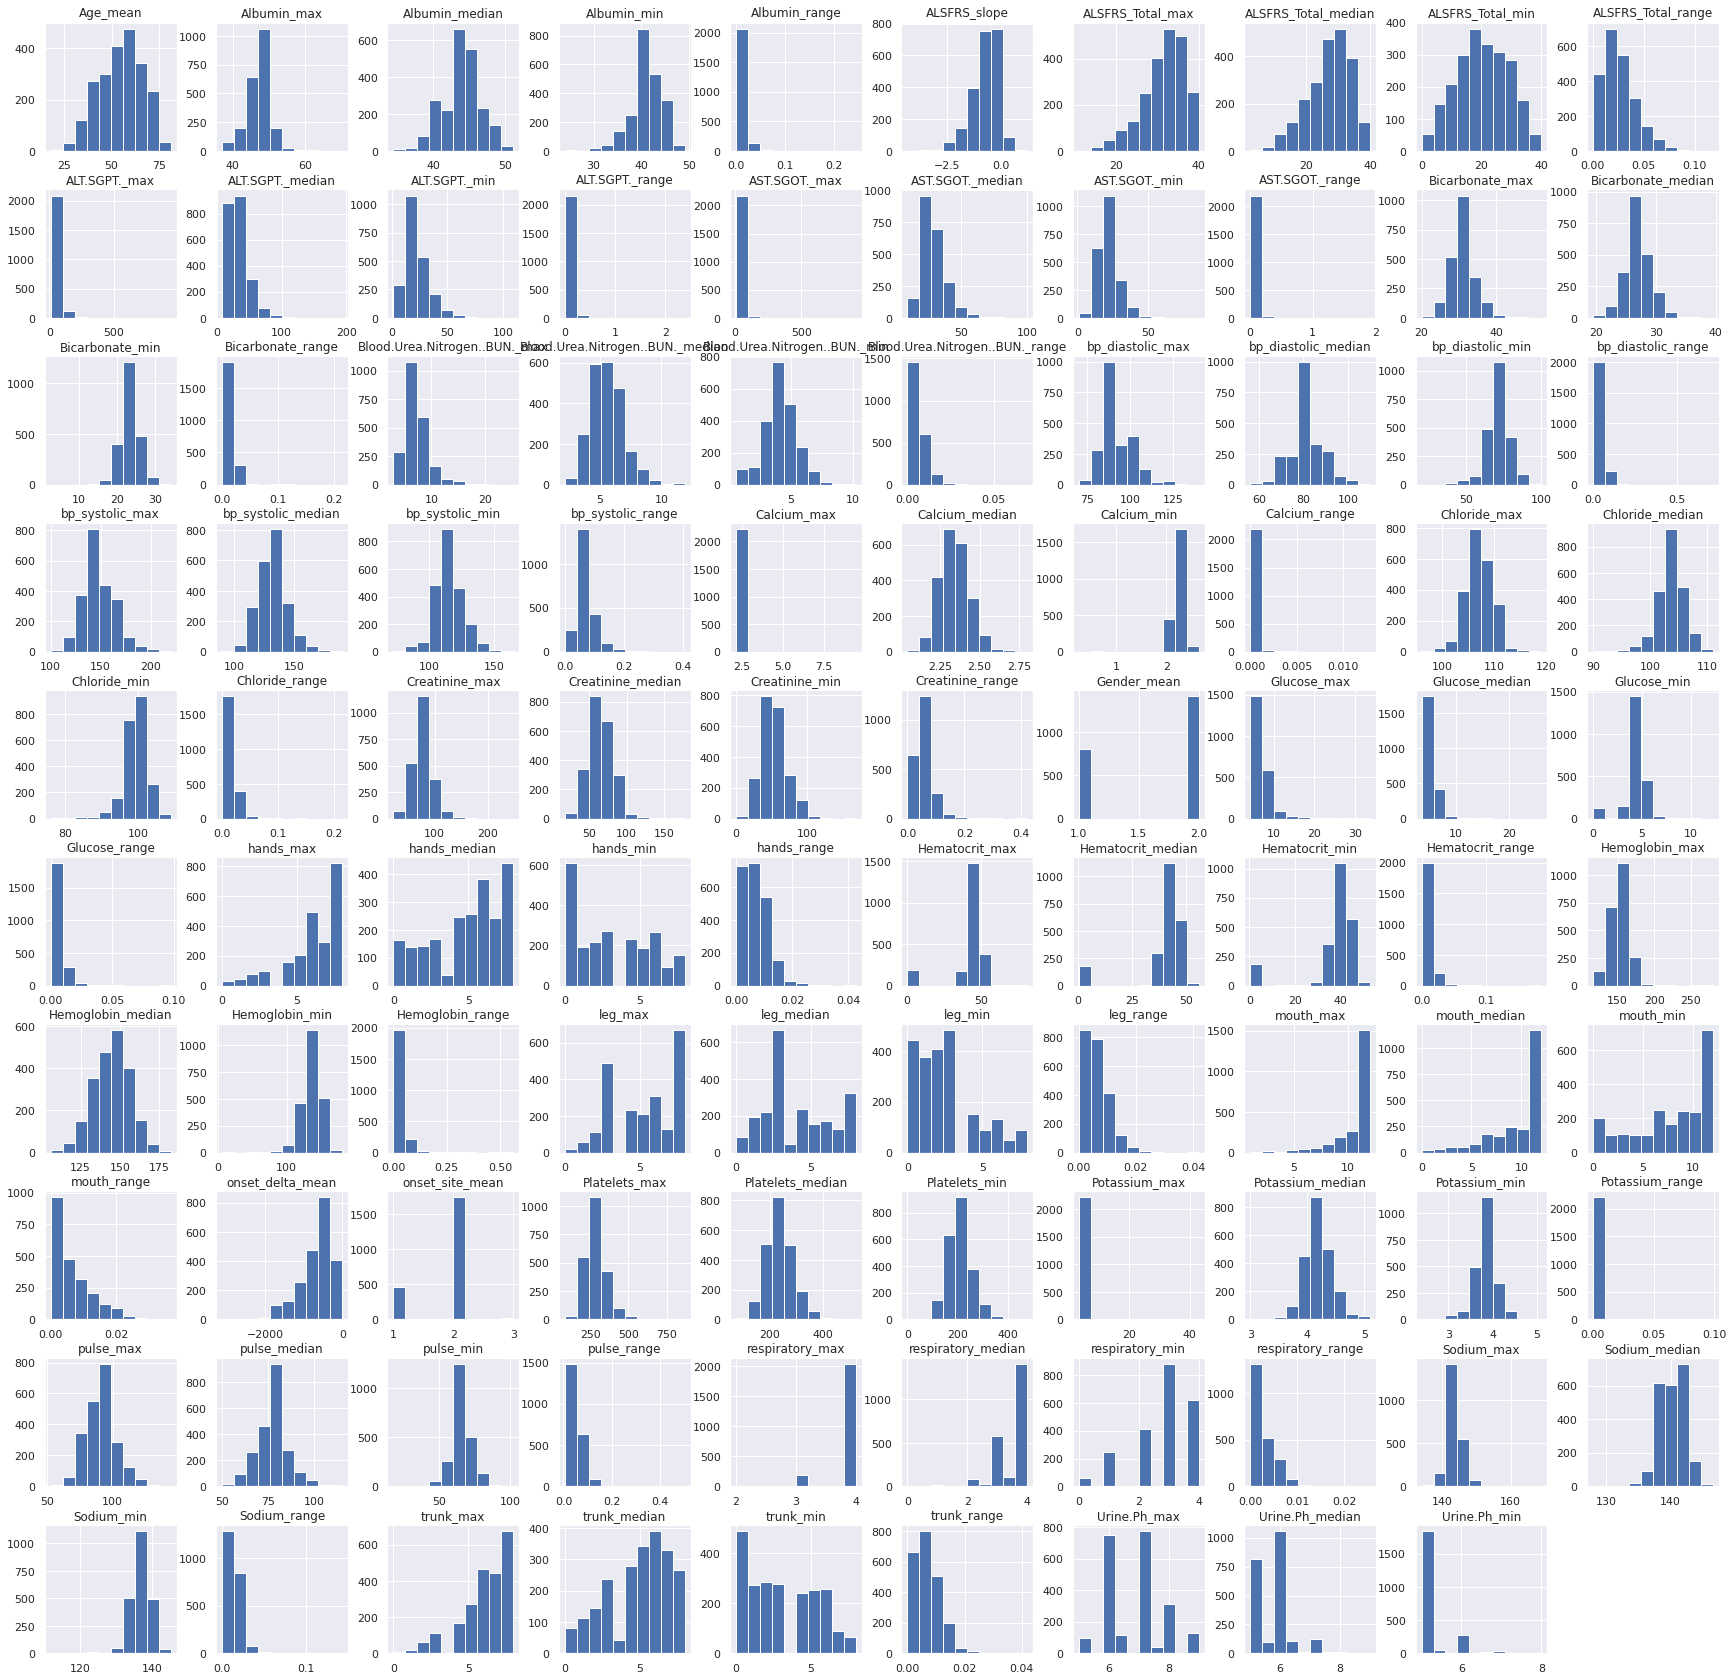

In [10]:
hist_plot = df_train_model.hist(figsize=(30,30))

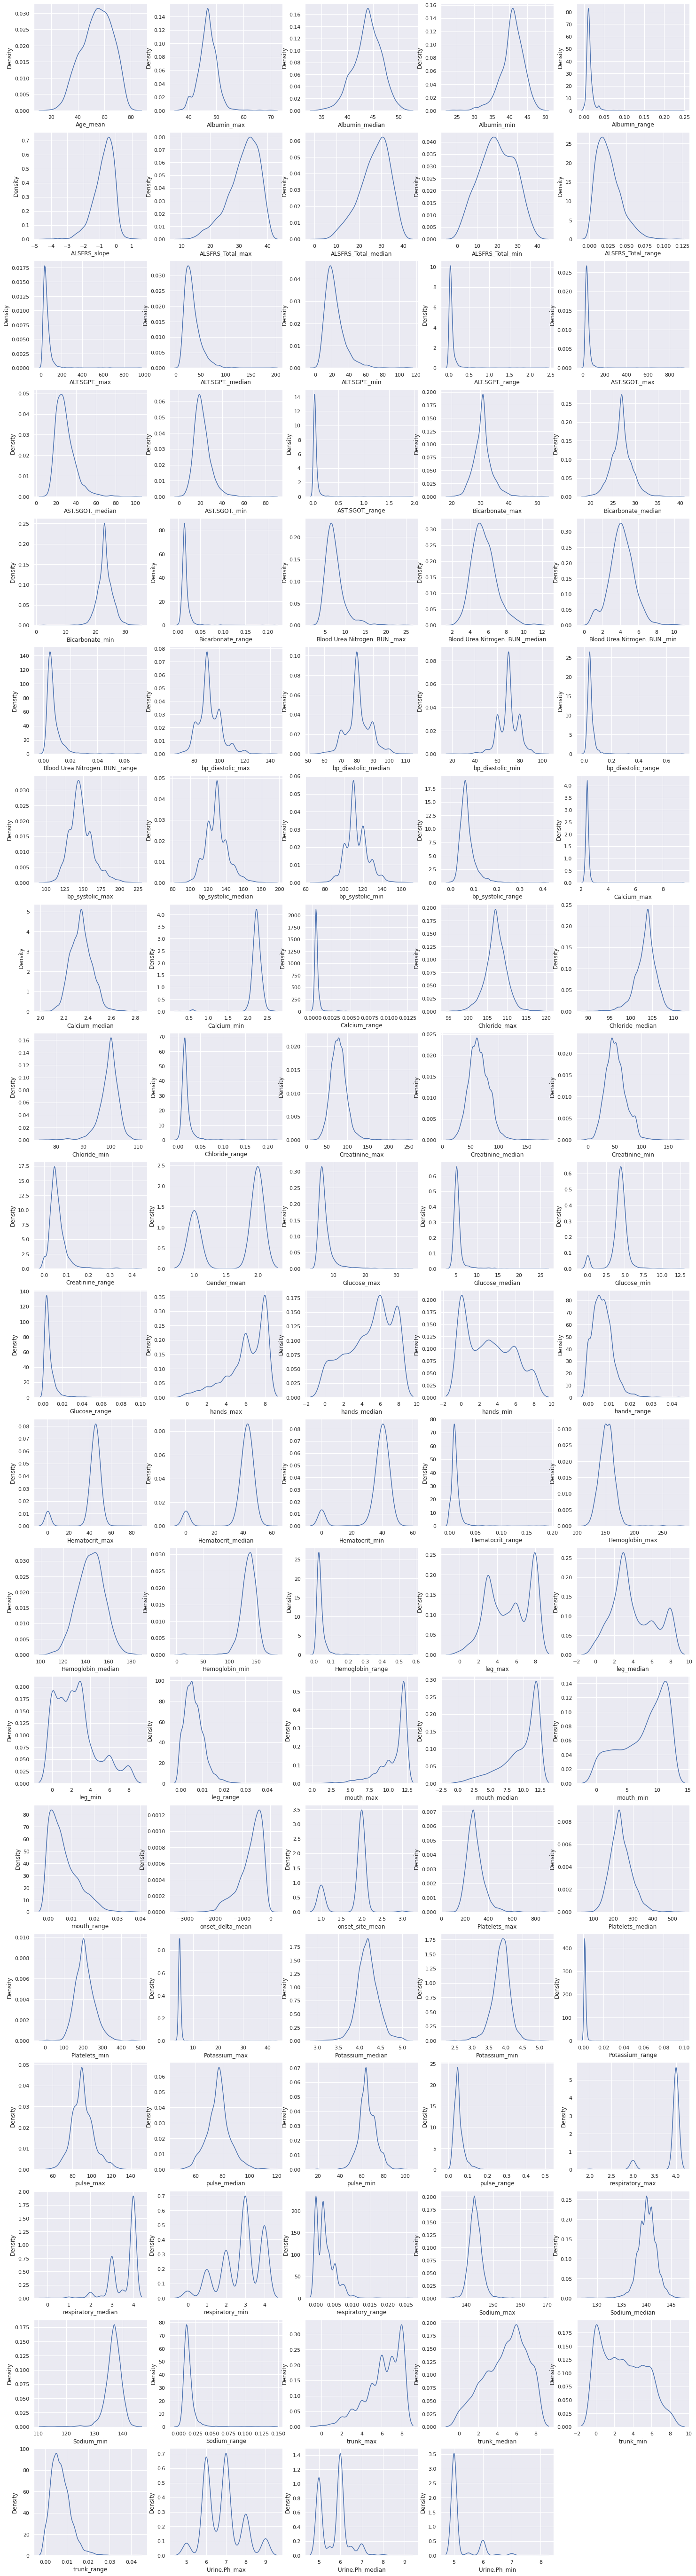

In [11]:
plt.figure(figsize=(25,120))
for i, col in enumerate(df_train_model.columns):
    if df_train_model[col].dtype != 'object':
        ax = plt.subplot(24, 5, i+1)
        sns.kdeplot(df_train_model[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

In [12]:
cols = ['Albumin_range','ALT.SGPT._max','ALT.SGPT._range','AST.SGOT._max','AST.SGOT._range','Bicarbonate_range',
        'bp_diastolic_range','Calcium_max','Calcium_range','Chloride_max','Glucose_median','Glucose_range',
        'Hematocrit_range','Hemoglobin_range','Potassium_max','Potassium_range','respiratory_max']

In [13]:
import numpy as np

for col in cols:
    df_train_model[col] = np.log(1 + df_train_model[col])

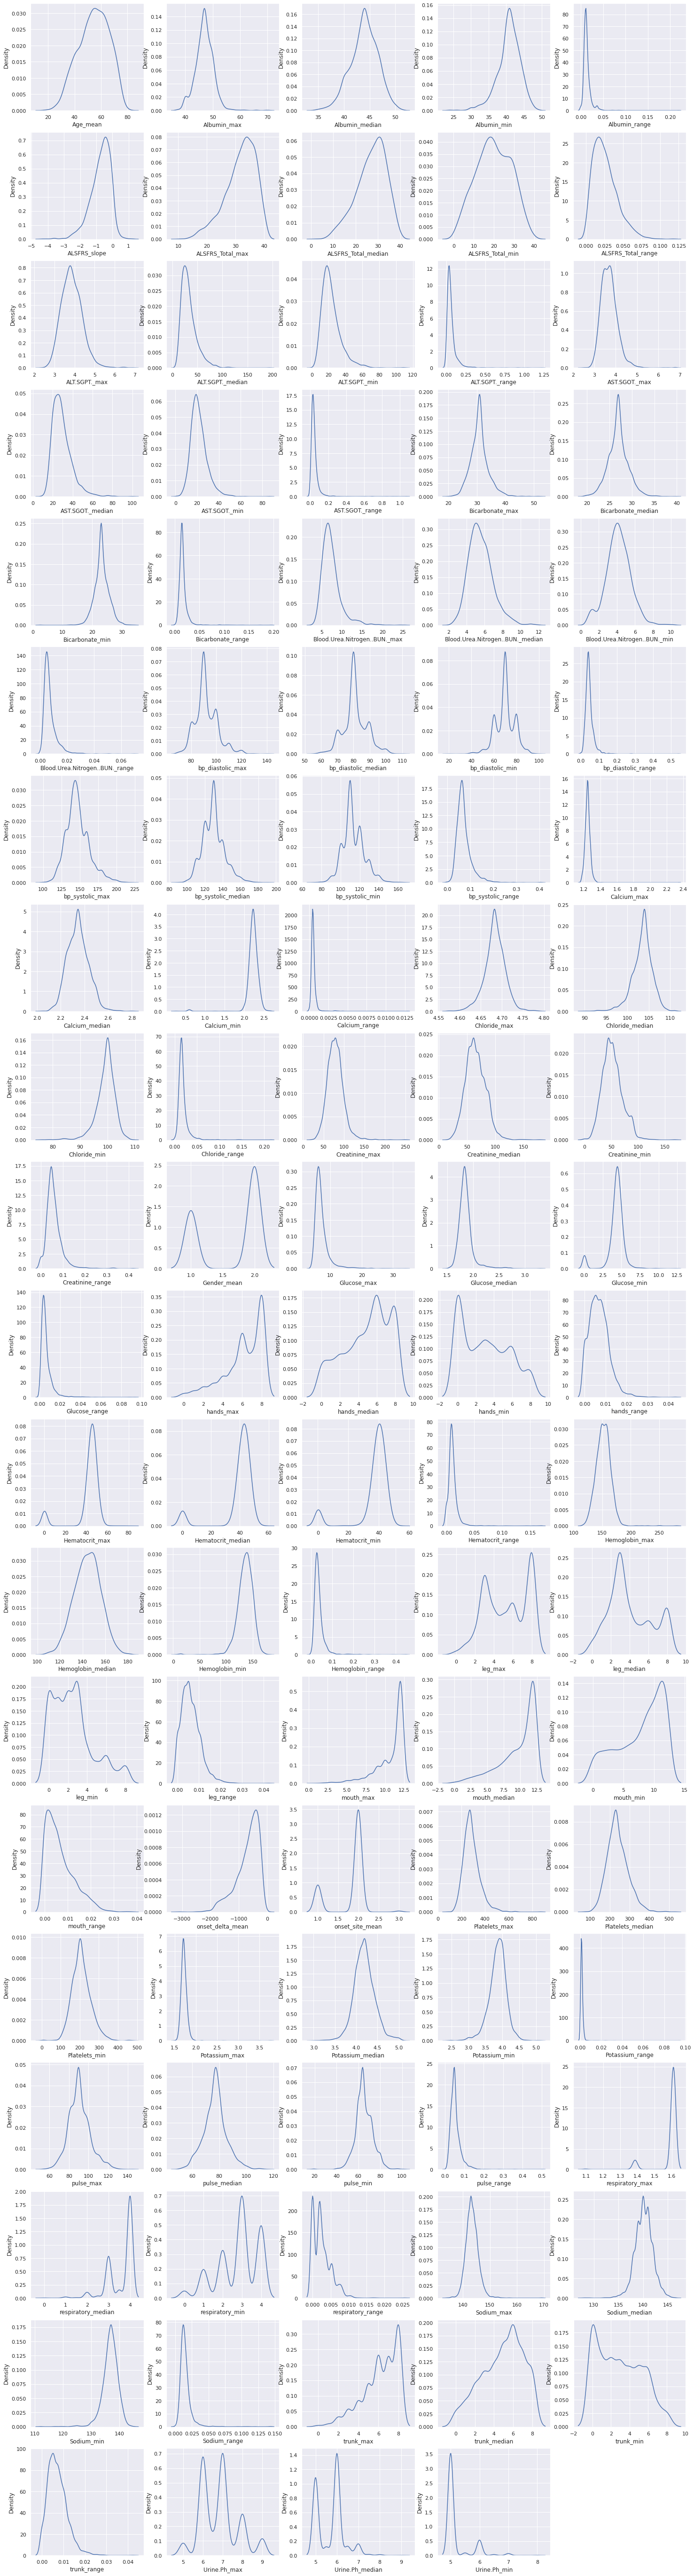

In [14]:
plt.figure(figsize=(25,120))
for i, col in enumerate(df_train_model.columns):
    if df_train_model[col].dtype != 'object':
        ax = plt.subplot(24, 5, i+1)
        sns.kdeplot(df_train_model[col], ax=ax)
        plt.xlabel(col)
        
plt.show()


module://ipykernel.pylab.backend_inline


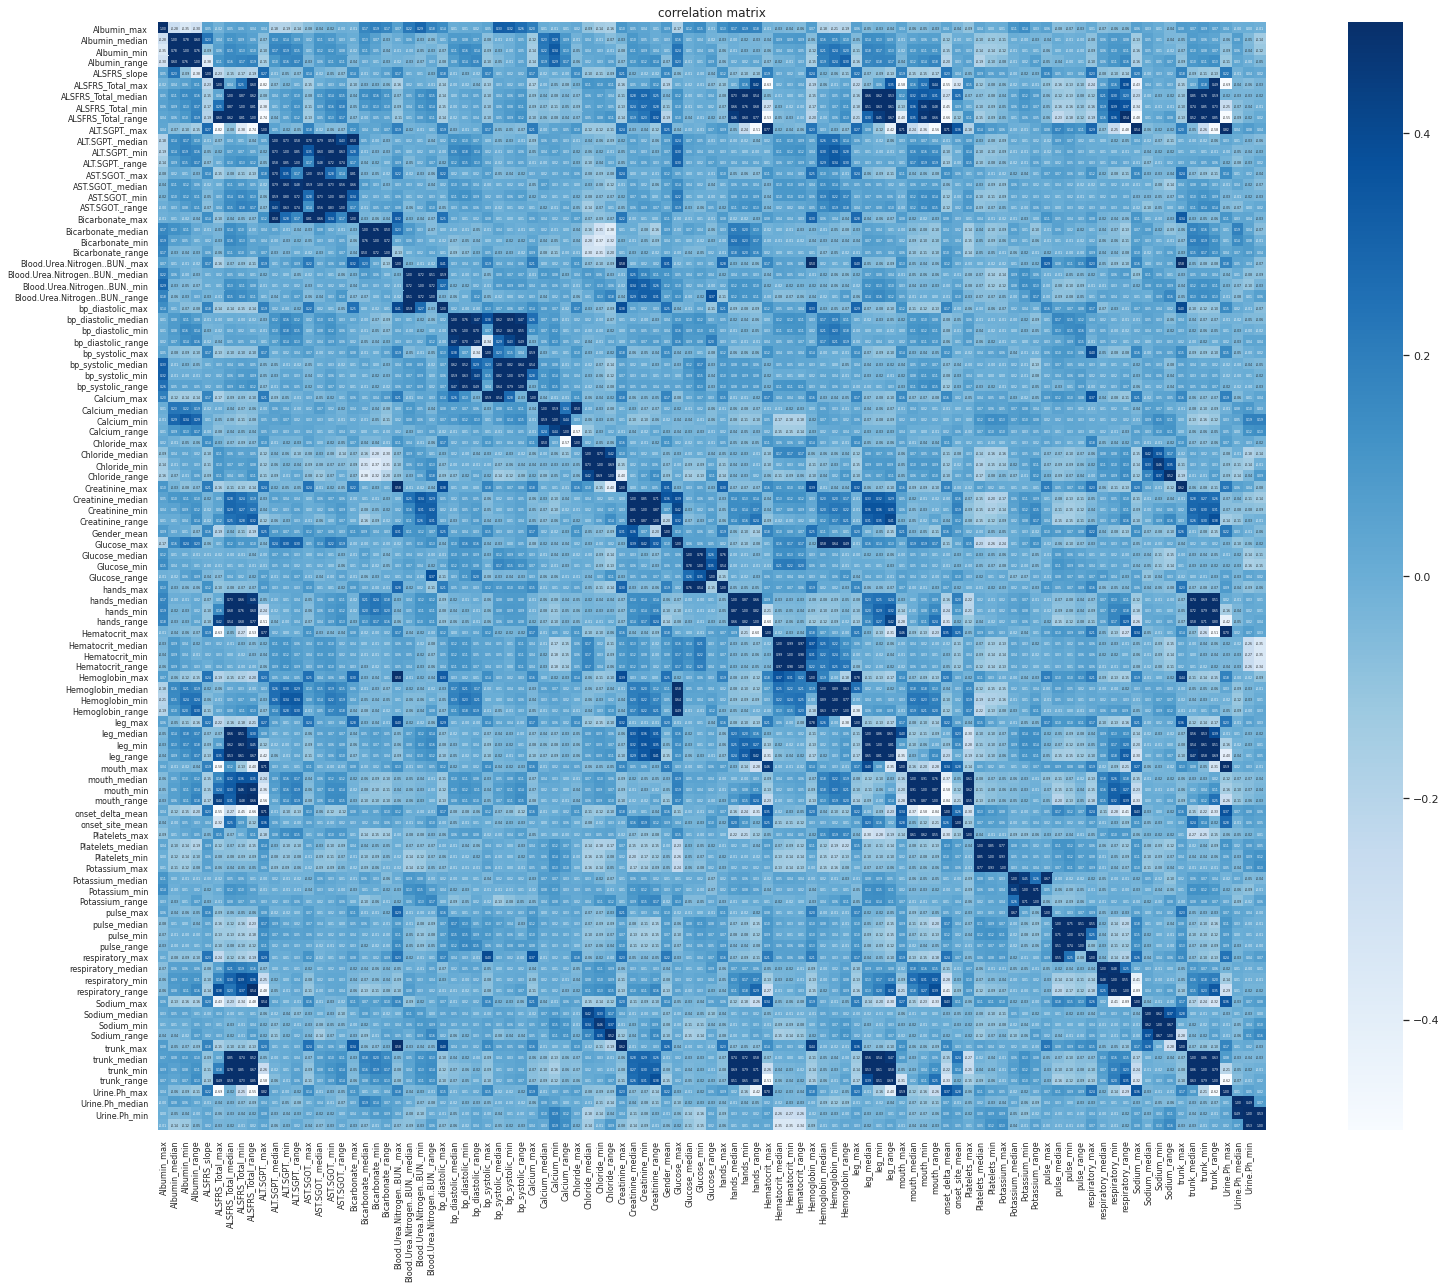

In [15]:

print(plt.get_backend())

# close any existing plots
plt.close("all")

corr = df_train_model.iloc[:, 1:].corr()

fig, ax = plt.subplots(figsize=(24, 18))

hm = sns.heatmap(df_train_model.corr(), cbar=True, vmin=-0.5, vmax=0.5,
                 fmt='.2f', annot_kws={'size': 3}, annot=True, 
                 square=True, cmap=plt.cm.Blues)

ticks = np.arange(corr.shape[0]) + 0.5
ax.set_xticks(ticks)
ax.set_xticklabels(corr.columns, rotation=90, fontsize=8)
ax.set_yticks(ticks)
ax.set_yticklabels(corr.index, rotation=360, fontsize=8)

ax.set_title('correlation matrix')
plt.tight_layout()
plt.savefig("corr_matrix_incl_anno_double.png", dpi=500)

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train = pca.fit_transform(df_train_model)

In [17]:
# Converting attribute values in both train and test data sets into their respective standard z scores
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
standard_scaler.fit_transform(X_train)

array([[ 0.83126992, -1.45295695],
       [-0.83072121,  0.22093031],
       [ 1.21124303, -0.6650578 ],
       ...,
       [ 2.20178518, -0.34344274],
       [-0.30152384, -0.24299961],
       [-1.16791   ,  0.93220438]])

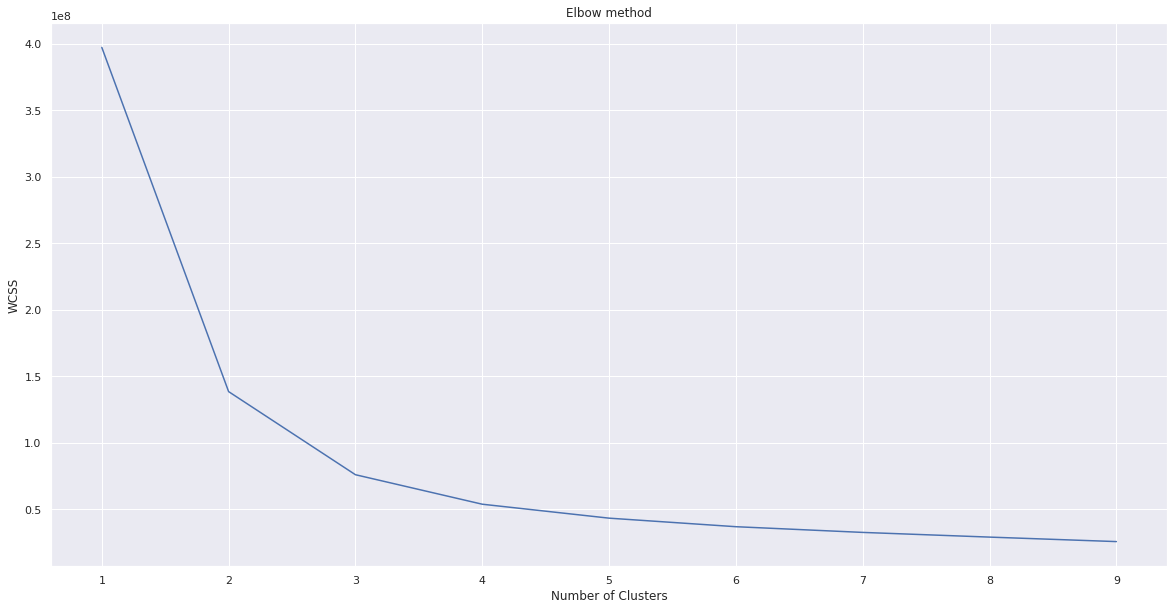

In [18]:
from sklearn.cluster import KMeans

kmeans_models = [KMeans(n_clusters=k, random_state=23).fit(X_train) for k in range (1, 10)]
innertia = [model.inertia_ for model in kmeans_models]

fig, ax = plt.subplots(figsize=(20,10))
plt.plot(range(1, 10), innertia)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
# As we can see above graph maximum accuracy occurs from k=2 to k=4

In [20]:
# Preprocessing test data
X_test = df_test.drop(labels=['ID','SubjectID'], axis=1)

In [21]:
standard_scaler = StandardScaler()
standard_scaler.fit(X_test)
X_test = standard_scaler.transform(X_test)

In [22]:
# Building model using one of our best k values

def Kmeansmodel(X, n_neighbors):
    kmeans_model = KMeans(n_neighbors)
    kmeans_model.fit(X)
    clust_labels = kmeans_model.predict(X)
    cent = kmeans_model.cluster_centers_
    return (clust_labels, cent)



In [23]:
# K=2
clust_labels_1, cent_1 = Kmeansmodel(X_train, 2)
kmeans_1 = pd.DataFrame(clust_labels_1)

In [24]:
kmeans_1

,0
0,1
1,0
2,1
3,0
4,1
...,...
2218,0
2219,0
2220,1
2221,0


In [25]:
# k=3
clust_labels_2, cent_2 = Kmeansmodel(X_train, 3)
kmeans_2 = pd.DataFrame(clust_labels_2)

In [26]:
kmeans_2

,0
0,0
1,1
2,2
3,1
4,2
...,...
2218,0
2219,1
2220,2
2221,1


In [27]:
# k=4
clust_labels_3, cent_3 = Kmeansmodel(X_train, 4)
kmeans_3 = pd.DataFrame(clust_labels_3)

In [28]:
kmeans_3

,0
0,3
1,2
2,3
3,2
4,1
...,...
2218,0
2219,0
2220,1
2221,0


In [ ]:
# Visualizing the cluster results
# First assign the clustering labels to as cluster index to our original dataset
df_train_model['cluster_id'] = clust_labels_3

In [ ]:
df_train_model

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,ALT.SGPT._max,ALT.SGPT._median,ALT.SGPT._min,ALT.SGPT._range,AST.SGOT._max,AST.SGOT._median,AST.SGOT._min,AST.SGOT._range,Bicarbonate_max,Bicarbonate_median,Bicarbonate_min,Bicarbonate_range,Blood.Urea.Nitrogen..BUN._max,Blood.Urea.Nitrogen..BUN._median,Blood.Urea.Nitrogen..BUN._min,Blood.Urea.Nitrogen..BUN._range,bp_diastolic_max,bp_diastolic_median,bp_diastolic_min,bp_diastolic_range,bp_systolic_max,bp_systolic_median,bp_systolic_min,bp_systolic_range,Calcium_max,Calcium_median,Calcium_min,Calcium_range,Chloride_max,Chloride_median,...,Hemoglobin_median,Hemoglobin_min,Hemoglobin_range,leg_max,leg_median,leg_min,leg_range,mouth_max,mouth_median,mouth_min,mouth_range,onset_delta_mean,onset_site_mean,Platelets_max,Platelets_median,Platelets_min,Potassium_max,Potassium_median,Potassium_min,Potassium_range,pulse_max,pulse_median,pulse_min,pulse_range,respiratory_max,respiratory_median,respiratory_min,respiratory_range,Sodium_max,Sodium_median,Sodium_min,Sodium_range,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min,cluster_id
0,65,57.0,40.5,38.0,0.064103,-0.965608,30,28.0,22,0.021164,3.218876,22.0,18.0,0.020690,3.465736,27.5,23.0,0.027493,30.0,28.0,25.0,0.017272,8.0322,7.11945,6.57180,0.005089,90,83.0,69,0.054067,160,139.0,129,0.082011,1.251333,2.220550,2.22055,0.000956,4.700480,108.0,...,146.0,143.0,0.044300,8,6.5,4,0.010582,5,3.5,0,0.013228,-1023,1,172,169.0,152.0,1.704748,4.25,4.0,0.001741,79,68.0,61,0.047619,1.609438,3.0,3,0.002646,148.0,145.5,143.0,0.017422,8,7.0,7,0.002646,6.00,6.0,6.0,0
1,48,45.0,41.0,39.0,0.010399,-0.921717,37,33.0,21,0.028725,3.258097,13.0,8.0,0.029187,3.465736,17.0,14.0,0.029187,32.0,28.0,25.0,0.012121,8.3973,4.74630,4.01610,0.007633,80,78.0,64,0.028320,140,132.5,104,0.064632,1.200070,2.170650,2.02095,0.000521,4.691348,102.0,...,132.0,128.0,0.017272,8,7.5,3,0.008977,9,8.0,4,0.008977,-341,1,286,264.0,230.0,1.791759,4.30,3.9,0.001915,90,76.0,64,0.046679,1.609438,4.0,3,0.001795,142.0,138.0,136.0,0.010453,8,7.0,5,0.005386,7.00,5.0,5.0,1
2,38,50.0,47.0,45.0,0.008889,-0.914787,24,14.0,10,0.025000,3.258097,20.0,14.0,0.019452,3.218876,19.0,18.0,0.010657,35.0,29.0,24.0,0.019452,5.4765,4.38120,3.65100,0.003260,86,76.0,58,0.048790,120,110.0,90,0.053571,1.244169,2.295400,2.19560,0.000490,4.691348,106.0,...,154.0,151.0,0.017700,4,3.0,2,0.003571,10,7.0,4,0.010714,-1181,1,233,213.0,167.0,1.629241,4.00,3.9,0.000357,82,73.0,60,0.039286,1.609438,4.0,4,0.000000,145.0,143.0,140.0,0.008929,5,0.0,0,0.008929,6.00,5.0,5.0,0
3,63,47.0,44.0,41.0,0.012038,-0.598361,30,29.0,24,0.014963,4.143135,60.0,41.0,0.051044,3.850148,40.0,33.0,0.031905,23.0,20.0,20.0,0.007453,8.0322,8.03220,6.57180,0.003642,90,80.0,70,0.048671,150,130.0,120,0.074813,1.244169,2.345300,2.23000,0.000474,4.700480,107.0,...,145.0,144.0,0.024632,4,3.5,2,0.004988,12,12.0,12,0.000000,-365,2,275,233.0,204.0,1.667707,4.20,4.0,0.000748,84,72.0,68,0.039900,1.386294,3.0,3,0.000000,143.0,139.0,138.0,0.012469,5,5.0,3,0.004988,7.00,6.0,5.0,1
4,63,47.0,45.5,42.0,0.008258,-0.444039,32,27.5,20,0.020374,3.663562,26.5,22.0,0.026188,3.583519,26.5,20.0,0.024571,32.0,28.0,23.0,0.014815,5.1114,4.19865,3.65100,0.002422,100,80.0,68,0.051708,160,130.0,104,0.092869,1.229684,2.257975,2.17065,0.000414,4.682131,104.0,...,146.5,138.0,0.022952,2,2.0,0,0.003396,12,12.0,12,0.000000,-1768,2,313,283.5,268.0,1.722767,3.75,3.5,0.001823,101,96.0,74,0.044776,1.609438,4.0,3,0.001698,143.0,140.0,138.0,0.008292,6,4.0,1,0.008489,6.00,5.0,5.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,33,50.0,49.0,45.0,0.008734,-0.239501,35,32.5,30,0.00

In [ ]:
# We need to inverse log transform of the columns that we have transformed earlier

for col in cols:
    df_train_model[col] = np.exp(df_train_model[col])

In [ ]:
df_train_model

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,ALT.SGPT._max,ALT.SGPT._median,ALT.SGPT._min,ALT.SGPT._range,AST.SGOT._max,AST.SGOT._median,AST.SGOT._min,AST.SGOT._range,Bicarbonate_max,Bicarbonate_median,Bicarbonate_min,Bicarbonate_range,Blood.Urea.Nitrogen..BUN._max,Blood.Urea.Nitrogen..BUN._median,Blood.Urea.Nitrogen..BUN._min,Blood.Urea.Nitrogen..BUN._range,bp_diastolic_max,bp_diastolic_median,bp_diastolic_min,bp_diastolic_range,bp_systolic_max,bp_systolic_median,bp_systolic_min,bp_systolic_range,Calcium_max,Calcium_median,Calcium_min,Calcium_range,Chloride_max,Chloride_median,...,Hemoglobin_median,Hemoglobin_min,Hemoglobin_range,leg_max,leg_median,leg_min,leg_range,mouth_max,mouth_median,mouth_min,mouth_range,onset_delta_mean,onset_site_mean,Platelets_max,Platelets_median,Platelets_min,Potassium_max,Potassium_median,Potassium_min,Potassium_range,pulse_max,pulse_median,pulse_min,pulse_range,respiratory_max,respiratory_median,respiratory_min,respiratory_range,Sodium_max,Sodium_median,Sodium_min,Sodium_range,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min,cluster_id
0,65,57.0,40.5,38.0,1.066202,-0.965608,30,28.0,22,0.021164,25.0,22.0,18.0,1.020906,32.0,27.5,23.0,1.027875,30.0,28.0,25.0,1.017422,8.0322,7.11945,6.57180,0.005089,90,83.0,69,1.055556,160,139.0,129,0.082011,3.49500,2.220550,2.22055,1.000956,110.0,108.0,...,146.0,143.0,1.045296,8,6.5,4,0.010582,5,3.5,0,0.013228,-1023,1,172,169.0,152.0,5.5,4.25,4.0,1.001742,79,68.0,61,0.047619,5.0,3.0,3,0.002646,148.0,145.5,143.0,0.017422,8,7.0,7,0.002646,6.00,6.0,6.0,0
1,48,45.0,41.0,39.0,1.010453,-0.921717,37,33.0,21,0.028725,26.0,13.0,8.0,1.029617,32.0,17.0,14.0,1.029617,32.0,28.0,25.0,1.012195,8.3973,4.74630,4.01610,0.007633,80,78.0,64,1.028725,140,132.5,104,0.064632,3.32035,2.170650,2.02095,1.000522,109.0,102.0,...,132.0,128.0,1.017422,8,7.5,3,0.008977,9,8.0,4,0.008977,-341,1,286,264.0,230.0,6.0,4.30,3.9,1.001916,90,76.0,64,0.046679,5.0,4.0,3,0.001795,142.0,138.0,136.0,0.010453,8,7.0,5,0.005386,7.00,5.0,5.0,1
2,38,50.0,47.0,45.0,1.008929,-0.914787,24,14.0,10,0.025000,26.0,20.0,14.0,1.019643,25.0,19.0,18.0,1.010714,35.0,29.0,24.0,1.019643,5.4765,4.38120,3.65100,0.003260,86,76.0,58,1.050000,120,110.0,90,0.053571,3.47005,2.295400,2.19560,1.000490,109.0,106.0,...,154.0,151.0,1.017857,4,3.0,2,0.003571,10,7.0,4,0.010714,-1181,1,233,213.0,167.0,5.1,4.00,3.9,1.000357,82,73.0,60,0.039286,5.0,4.0,4,0.000000,145.0,143.0,140.0,0.008929,5,0.0,0,0.008929,6.00,5.0,5.0,0
3,63,47.0,44.0,41.0,1.012111,-0.598361,30,29.0,24,0.014963,63.0,60.0,41.0,1.052369,47.0,40.0,33.0,1.032419,23.0,20.0,20.0,1.007481,8.0322,8.03220,6.57180,0.003642,90,80.0,70,1.049875,150,130.0,120,0.074813,3.47005,2.345300,2.23000,1.000474,110.0,107.0,...,145.0,144.0,1.024938,4,3.5,2,0.004988,12,12.0,12,0.000000,-365,2,275,233.0,204.0,5.3,4.20,4.0,1.000748,84,72.0,68,0.039900,4.0,3.0,3,0.000000,143.0,139.0,138.0,0.012469,5,5.0,3,0.004988,7.00,6.0,5.0,1
4,63,47.0,45.5,42.0,1.008292,-0.444039,32,27.5,20,0.020374,39.0,26.5,22.0,1.026534,36.0,26.5,20.0,1.024876,32.0,28.0,23.0,1.014925,5.1114,4.19865,3.65100,0.002422,100,80.0,68,1.053068,160,130.0,104,0.092869,3.42015,2.257975,2.17065,1.000414,108.0,104.0,...,146.5,138.0,1.023217,2,2.0,0,0.003396,12,12.0,12,0.000000,-1768,2,313,283.5,268.0,5.6,3.75,3.5,1.001824,101,96.0,74,0.044776,5.0,4.0,3,0.001698,143.0,140.0,138.0,0.008292,6,4.0,1,0.008489,6.00,5.0,5.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,33,50.0,49.0,45.0,1.008772,-0.239501,35,32.5,30,0.009107,47.0,27.0,18.0,1.049123,39.0,27.0,23.0,1.026316,31.0,28.0,23.0,1.014035,5.4765,3.65100,2.92080,0.004484,8

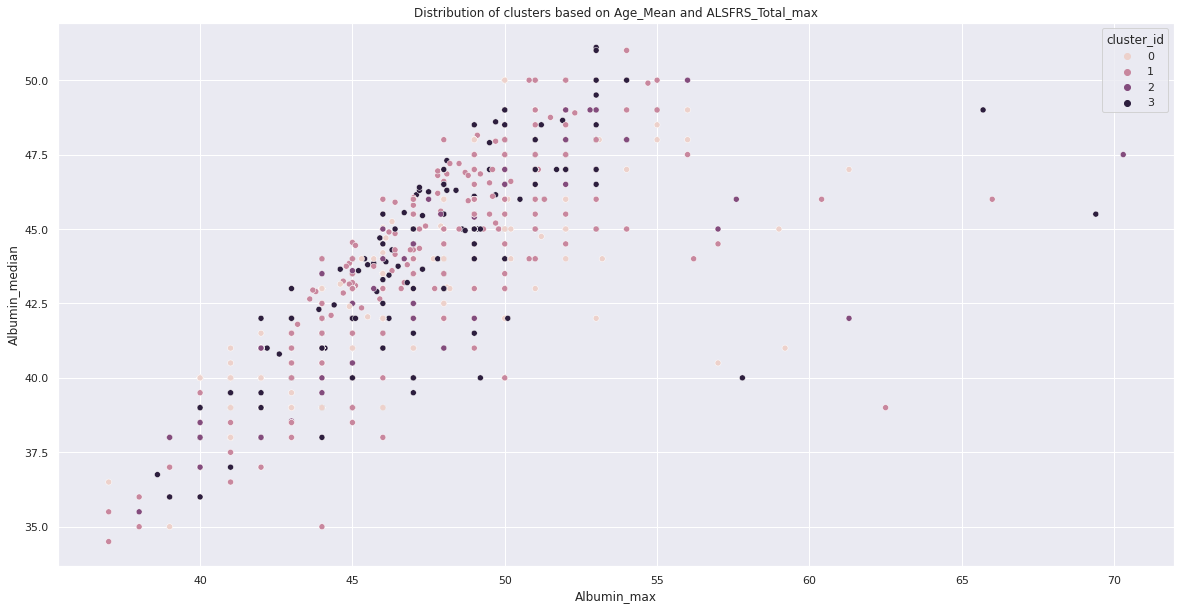

In [ ]:
# Let us show the clusters with any two features at a time

# 1. Distribution of clusters based on Age_Mean and ALSFRS_Total_max

plt.figure(figsize=(20,10))
sns.scatterplot(data=df_train_model, x='Albumin_max', y='Albumin_median', hue='cluster_id')
plt.title('Distribution of clusters based on Age_Mean and ALSFRS_Total_max')
plt.show()

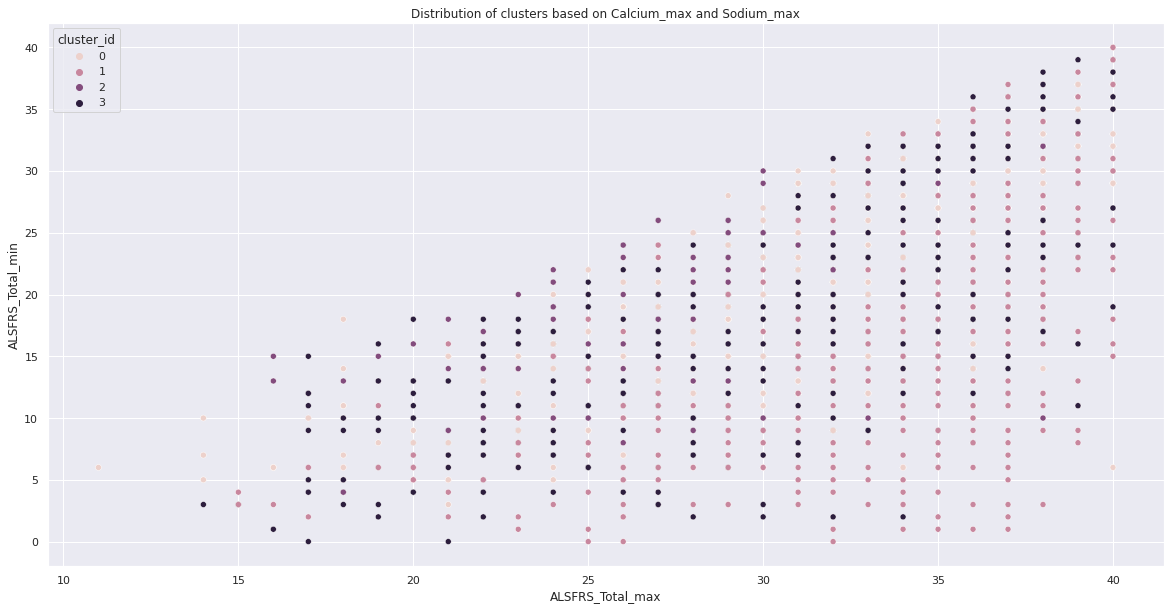

In [ ]:
# 2. Distribution of clusters based on Calcium_max and Sodium_max

plt.figure(figsize=(20,10))
sns.scatterplot(data=df_train_model, x='ALSFRS_Total_max', y='ALSFRS_Total_min', hue='cluster_id')
plt.title('Distribution of clusters based on Calcium_max and Sodium_max')
plt.show()

In [29]:
from sklearn.metrics import silhouette_score

# For k=2

kmeans = KMeans(n_clusters=2, random_state=23)
kmeans.fit(X_train)

print('Silhoutte score of our model is ' + str(silhouette_score(X_train, kmeans.labels_)))

Silhoutte score of our model is 0.5953741779732218


In [30]:
# For K=3

kmeans = KMeans(n_clusters=3, random_state=23)
kmeans.fit(X_train)

print('Silhoutte score of our model is ' + str(silhouette_score(X_train, kmeans.labels_)))

Silhoutte score of our model is 0.5116216294311347


In [31]:
# For k=4

kmeans = KMeans(n_clusters=4, random_state=23)
kmeans.fit(X_train)

print('Silhoutte score of our model is ' + str(silhouette_score(X_train, kmeans.labels_)))

Silhoutte score of our model is 0.445558852752049
